In [1]:
print('welcome back')

welcome back


In [21]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [24]:
df = df.explode('job_skills')
df.dropna(subset='salary_year_avg',inplace=True)
df[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
28,109500.0,gdpr
28,109500.0,excel
77,140000.0,mongodb
77,140000.0,mongodb
77,140000.0,python


In [1]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

NameError: name 'load_dataset' is not defined

In [3]:
df['job_posted_date']

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

In [4]:
df.iloc[[2,3],[15,16]]

,job_skills,job_type_skills
2,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120719 entries, 28 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        120719 non-null  object        
 1   job_title              120719 non-null  object        
 2   job_location           119349 non-null  object        
 3   job_via                120719 non-null  object        
 4   job_schedule_type      120659 non-null  object        
 5   job_work_from_home     120719 non-null  bool          
 6   search_location        120719 non-null  object        
 7   job_posted_date        120719 non-null  datetime64[ns]
 8   job_no_degree_mention  120719 non-null  bool          
 9   job_health_insurance   120719 non-null  bool          
 10  job_country            120719 non-null  object        
 11  salary_rate            120719 non-null  object        
 12  salary_year_avg        120719 non-null  float64 

In [20]:
df.job_country.head(10)

0    United States
1           Mexico
2          Germany
3    United States
4            Sudan
5    United States
6    United States
7          Romania
8          Denmark
9    United States
Name: job_country, dtype: object

In [4]:
df=df.dropna(subset=['salary_year_avg']).reset_index()
df=df.drop('index',axis=1)
df['salary_year_avg'].tail(100)
#values={'salary_rate' : 0}
#df=df.fillna(value=values)
#df

21903    125000.0
21904    115000.0
21905    130000.0
21906    136950.0
21907    209000.0
           ...   
21998    139216.0
21999    150000.0
22000    221875.0
22001    157500.0
22002    157500.0
Name: salary_year_avg, Length: 100, dtype: float64

In [5]:
df_us= df[df['job_country']== 'United States'].copy()

In [22]:
df_us.iloc[[2,3],[15,16]]

,job_skills,job_type_skills
5,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,"['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."


In [6]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

In [28]:
df_us = df_us.dropna(how='all')
df_us.info()  #if all values are na in row dropping the column

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

In [37]:
df_us= df_us.fillna(0)
df_us.info()

<class 'pandas.core.series.Series'>
Index: 206292 entries, 0 to 785705
Series name: salary_rate
Non-Null Count   Dtype 
--------------   ----- 
206292 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [49]:
df_us= df[df['job_country']== 'United States'].copy()
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 2 to 22002
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15766 non-null  object        
 1   job_title              15766 non-null  object        
 2   job_location           15544 non-null  object        
 3   job_via                15766 non-null  object        
 4   job_schedule_type      15752 non-null  object        
 5   job_work_from_home     15766 non-null  bool          
 6   search_location        15766 non-null  object        
 7   job_posted_date        15766 non-null  datetime64[ns]
 8   job_no_degree_mention  15766 non-null  bool          
 9   job_health_insurance   15766 non-null  bool          
 10  job_country            15766 non-null  object        
 11  salary_rate            15766 non-null  object        
 12  salary_year_avg        15766 non-null  float64       
 13  salary

In [14]:
df_us=df_us.dropna(subset=['salary_year_avg'])
#df_us["salary_year_avg"]=df_us["salary_year_avg"].astype(float)
#df_us["salary_hour_avg"]=df_us["salary_hour_avg"].astype(float)
df_us.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15766 non-null  object        
 1   job_title              15766 non-null  object        
 2   job_location           15544 non-null  object        
 3   job_via                15766 non-null  object        
 4   job_schedule_type      15752 non-null  object        
 5   job_work_from_home     15766 non-null  bool          
 6   search_location        15766 non-null  object        
 7   job_posted_date        15766 non-null  datetime64[ns]
 8   job_no_degree_mention  15766 non-null  bool          
 9   job_health_insurance   15766 non-null  bool          
 10  job_country            15766 non-null  object        
 11  salary_rate            15766 non-null  object        
 12  salary_year_avg        15766 non-null  float64       
 13  sala

In [6]:
df_us.sort_values('salary_year_avg',ascending= False ,inplace=True)
#df_us.drop('salary_year',axis=1,inplace=True)
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
14887,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,"Illinois, United States",2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","['java', 'c++', 'python', 'r']","{'programming': ['java', 'c++', 'python', 'r']}"
9937,Data Scientist,Geographic Information Systems Analyst - GIS A...,"New York, NY",via ZipRecruiter,Full-time,False,"New York, United States",2023-12-27 18:00:12,False,False,United States,year,585000.0,NaN,ReServe,['excel'],{'analyst_tools': ['excel']}
10446,Data Engineer,Hybrid - Data Engineer - Up to $600k,"New York, NY",via LinkedIn,Full-time,False,"Florida, United States",2023-04-05 16:10:48,False,False,United States,year,525000.0,NaN,Durlston Partners,"['python', 'c++']","{'programming': ['python', 'c++']}"
14867,Data Scientist,Staff Data Scientist - Business Analytics,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-09-01 19:24:02,False,False,United States,year,525000.0,NaN,Selby Jennings,['sql'],{'programming': ['sql']}
10885,Senior Data Scientist,Senior Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 16:03:46,False,False,United States,year,475000.0,NaN,Glocomms,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,Data Scientist,Alternant Data Scientist KALTD,West Virginia,via Indeed,Full-time and Internship,False,Georgia,2023-10-30 08:55:09,False,False,United States,year,30000.0,NaN,Kaisens Data,"['python', 'sql', 'nosql', 'mongodb', 'mongodb...","{'databases': ['mongodb', 'mysql'], 'libraries..."
9309,Data Analyst,Data support analyst,"Florence, SC",via Talent.com,Full-time,False,Georgia,2023-10-05 23:42:07,True,True,United States,year,26444.0,NaN,University of Exeter,None,None
6735,Data Analyst,Research Scientist,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-07-17 07:05:58,False,True,United States,year,25000.0,NaN,ED-Energy Storage & Distributed R,None,None
6958,Data Engineer,Data Engineer (ETL) (TS/SCI + Poly),"Chantilly, VA",via Big Country Jobs,Full-time,False,Georgia,2023-07-25 07:42:22,False,False,United States,year,25000.0,NaN,the darkstar group llc,"['java', 'flow']","{'other': ['flow'], 'programming': ['java']}"


In [7]:
df_us.reset_index(inplace=True)
df_us.drop('index',axis=1,inplace=True)
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Scientist,Data Scientist,"Madison, SD",via Cooperative Career Center,Full-time,False,"Illinois, United States",2023-05-04 19:06:06,False,True,United States,year,960000.0,NaN,"East River Electric Power Cooperative, Inc.","['java', 'c++', 'python', 'r']","{'programming': ['java', 'c++', 'python', 'r']}"
1,Data Scientist,Geographic Information Systems Analyst - GIS A...,"New York, NY",via ZipRecruiter,Full-time,False,"New York, United States",2023-12-27 18:00:12,False,False,United States,year,585000.0,NaN,ReServe,['excel'],{'analyst_tools': ['excel']}
2,Data Engineer,Hybrid - Data Engineer - Up to $600k,"New York, NY",via LinkedIn,Full-time,False,"Florida, United States",2023-04-05 16:10:48,False,False,United States,year,525000.0,NaN,Durlston Partners,"['python', 'c++']","{'programming': ['python', 'c++']}"
3,Data Scientist,Staff Data Scientist - Business Analytics,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-09-01 19:24:02,False,False,United States,year,525000.0,NaN,Selby Jennings,['sql'],{'programming': ['sql']}
4,Senior Data Scientist,Senior Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-01-31 16:03:46,False,False,United States,year,475000.0,NaN,Glocomms,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15761,Data Scientist,Alternant Data Scientist KALTD,West Virginia,via Indeed,Full-time and Internship,False,Georgia,2023-10-30 08:55:09,False,False,United States,year,30000.0,NaN,Kaisens Data,"['python', 'sql', 'nosql', 'mongodb', 'mongodb...","{'databases': ['mongodb', 'mysql'], 'libraries..."
15762,Data Analyst,Data support analyst,"Florence, SC",via Talent.com,Full-time,False,Georgia,2023-10-05 23:42:07,True,True,United States,year,26444.0,NaN,University of Exeter,None,None
15763,Data Analyst,Research Scientist,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-07-17 07:05:58,False,True,United States,year,25000.0,NaN,ED-Energy Storage & Distributed R,None,None
15764,Data Engineer,Data Engineer (ETL) (TS/SCI + Poly),"Chantilly, VA",via Big Country Jobs,Full-time,False,Georgia,2023-07-25 07:42:22,False,False,United States,year,25000.0,NaN,the darkstar group llc,"['java', 'flow']","{'other': ['flow'], 'programming': ['java']}"


In [24]:
df_us=df_us.sort_values('salary_year_avg', ascending=False)

In [36]:
df_us.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
454012,Senior Data Engineer,Senior Data Engineer,"Herndon, VA",via LinkedIn,Full-time,False,"Florida, United States",2023-04-19 14:13:28,True,False,United States,0,0.0,0.0,Idexcel,"['scala', 'python', 'java', 'aws', 'snowflake'...","{'cloud': ['aws', 'snowflake', 'redshift'], 'l..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [9]:
#df_us.groupby('job_title_short')['salary_year_avg'].median()
df_us.groupby('job_title_short').size()

job_title_short
Business Analyst              431
Cloud Engineer                 20
Data Analyst                 4350
Data Engineer                2915
Data Scientist               4553
Machine Learning Engineer     128
Senior Data Analyst           913
Senior Data Engineer         1058
Senior Data Scientist        1241
Software Engineer             157
dtype: int64

In [13]:
df_us_jobcount=df_us.pivot_table(index='job_title_short',aggfunc='size')
df_us_jobcount
#df_us.pivot_table(values='salary_year_avg',index='job_title_short', aggfunc='median')

job_title_short
Business Analyst              431
Cloud Engineer                 20
Data Analyst                 4350
Data Engineer                2915
Data Scientist               4553
Machine Learning Engineer     128
Senior Data Analyst           913
Senior Data Engineer         1058
Senior Data Scientist        1241
Software Engineer             157
dtype: int64

In [28]:
df_us.groupby(['job_country', 'job_title_short'])['salary_year_avg'].agg(['max', 'median', 'min']).dropna()
df_us.pivot_table(
    values='salary_year_avg',
    index=['job_country', 'job_title_short'],
    aggfunc={'salary_year_avg': ['min', 'max', 'median']}
)

max    median      min
job_country   job_title_short                                       
United States Business Analyst           387460.0   90000.0  35000.0
              Cloud Engineer             221844.0  116100.0  42000.0
              Data Analyst               375000.0   90000.0  25000.0
              Data Engineer              525000.0  125000.0  23496.0
              Data Scientist             960000.0  130000.0  30000.0
              Machine Learning Engineer  315000.0  150000.0  44408.5
              Senior Data Analyst        425000.0  110000.0  35360.0
              Senior Data Engineer       375000.0  150000.0  45000.0
              Senior Data Scientist      475000.0  155000.0  55000.0
              Software Engineer          375000.0  130000.0  48982.0

In [46]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
).dropna()

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Australia,70000.0,110000.00,109500.00,106712.5,139216.0,101029.0,50640.0,147500.0,157500.0,118350.0
Canada,85000.0,130000.00,98500.00,105000.0,122500.0,149653.0,111175.0,125000.0,130000.0,125000.0
Colombia,120000.0,182500.00,90000.00,96773.0,128500.0,190000.0,111175.0,79200.0,70000.0,132500.0
France,89100.0,105968.00,69175.00,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.00,103750.00,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Israel,63000.0,79200.00,100500.00,128682.0,145000.0,79200.0,111175.0,147500.0,157500.0,79200.0
Philippines,63000.0,64800.00,83110.75,96773.0,75600.0,72000.0,111175.0,80786.5,72000.0,72000.0
Poland,87050.0,84150.00,89100.00,133500.0,131867.0,89100.0,111175.0,89100.0,157500.0,89100.0
Singapore,79200.0,50400.00,99500.00,98301.5,131560.0,101029.0,100500.0,147500.0,157500.0,64800.0


In [33]:
df_us.pivot_table(
    values='salary_year_avg',
    index=['job_country', 'job_title_short'],
    aggfunc={'salary_year_avg': ['min', 'max', 'median']}
)

max    median      min
job_country   job_title_short                                       
United States Business Analyst           387460.0   90000.0  35000.0
              Cloud Engineer             221844.0  116100.0  42000.0
              Data Analyst               375000.0   90000.0  25000.0
              Data Engineer              525000.0  125000.0  23496.0
              Data Scientist             960000.0  130000.0  30000.0
              Machine Learning Engineer  315000.0  150000.0  44408.5
              Senior Data Analyst        425000.0  110000.0  35360.0
              Senior Data Engineer       375000.0  150000.0  45000.0
              Senior Data Scientist      475000.0  155000.0  55000.0
              Software Engineer          375000.0  130000.0  48982.0

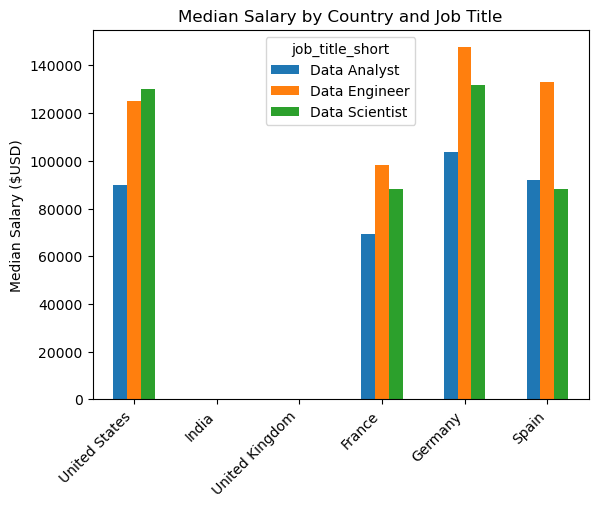

In [54]:
top_countries = df['job_country'].value_counts().head(6).index
# filter df_job_country_salary for top 6 countries
df_job_country_salary = df_job_country_salary.reindex(top_countries)
# filter df_job_country_salary for list of 6 job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] # 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')  
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15766 entries, 92 to 785692
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        15766 non-null  object        
 1   job_title              15766 non-null  object        
 2   job_location           15544 non-null  object        
 3   job_via                15766 non-null  object        
 4   job_schedule_type      15752 non-null  object        
 5   job_work_from_home     15766 non-null  bool          
 6   search_location        15766 non-null  object        
 7   job_posted_date        15766 non-null  datetime64[ns]
 8   job_no_degree_mention  15766 non-null  bool          
 9   job_health_insurance   15766 non-null  bool          
 10  job_country            15766 non-null  object        
 11  salary_rate            15766 non-null  object        
 12  salary_year_avg        15766 non-null  float64       
 13  sala

In [94]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%m')

In [98]:
df_us['job_posted_number'] = df_us['job_posted_date'].dt.strftime('%m')

In [100]:
df_us.sort_values('job_posted_number')

,level_0,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,...,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_number
7078,7078,380525,Data Engineer,Big Data Engineer,"Dearborn, MI",via Dice,Contractor,False,"New York, United States",2023-01-31 18:05:31,...,False,United States,year,169000.0,NaN,Stefanini,"['java', 'python', 'scala', 'sql', 'shell', 'a...","{'analyst_tools': ['splunk'], 'cloud': ['aws']...",Jan,01
13287,13287,672335,Machine Learning Engineer,"Director Engineering, AI / ML Platform","San Mateo, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-01-26 10:05:31,...,True,United States,year,116950.0,NaN,Roblox,['go'],{'programming': ['go']},Jan,01
1322,1322,69909,Data Engineer,Data Science / Discrete Optimization Engineer,"San Francisco, CA",via Ladders,Full-time,False,"California, United States",2023-01-25 06:03:51,...,True,United States,year,125000.0,NaN,Alto,"['java', 'python', 'aws', 'gcp', 'git']","{'cloud': ['aws', 'gcp'], 'other': ['git'], 'p...",Jan,01
4606,4606,235190,Data Engineer,"BI Data Engineer, Lead","Minneapolis, MN",via Ladders,Full-time,False,"California, United States",2023-01-30 07:07:34,...,True,United States,year,115000.0,NaN,RSM US,"['sql', 'azure', 'databricks', 'ssis']","{'analyst_tools': ['ssis'], 'cloud': ['azure',...",Jan,01
8052,8052,423073,Data Analyst,Professional Data Analyst. Job in California M...,California,via My Valley Jobs Today,Full-time,False,"California, United States",2023-01-14 16:01:35,...,False,United States,year,81350.0,NaN,Fortuna BMC,['sql'],{'programming': ['sql']},Jan,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11631,11631,592640,Data Analyst,Technical Lead - Data Analysis,"Sullivan's Island, SC",via ProActuary,Full-time,False,Georgia,2023-12-28 10:21:03,...,True,United States,year,140500.0,NaN,TIAA,"['sql', 'python', 'oracle', 'unix', 'windows']","{'cloud': ['oracle'], 'os': ['unix', 'windows'...",Dec,12
15046,15046,752568,Data Analyst,College of Engineering Data Analyst,"Tallahassee, FL",via Indeed,Full-time,False,Georgia,2023-12-07 21:03:59,...,True,United States,year,50000.0,NaN,Florida State University,"['power bi', 'excel']","{'analyst_tools': ['power bi', 'excel']}",Dec,12
2817,2817,160351,Senior Data Scientist,Senior Data Scientist. Job in United States WD...,United States,via WDTN Jobs,Full-time,False,"Texas, United States",2023-12-19 15:04:30,...,True,United States,year,173125.0,NaN,Coinbase,"['sql', 'python']","{'programming': ['sql', 'python']}",Dec,12
11623,11623,592274,Data Analyst,Data Analyst,"Orlando, FL",via BeBee,Full-time,False,"Florida, United States",2023-12-13 09:02:52,...,True,United States,year,100000.0,NaN,Siemens Energy,None,None,Dec,12


In [83]:
df_us_pivot = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [86]:
df_us_pivot.fillna(0).astype(int)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
Apr,35,1,357,238,338,14,89,87,90,14
Aug,56,3,438,279,465,11,88,86,146,15
Dec,27,1,359,184,267,9,52,60,45,13
Feb,23,3,341,308,382,13,77,112,110,12
Jan,23,0,456,236,486,14,119,85,150,7
Jul,36,4,414,226,510,13,83,79,126,23
Jun,27,2,443,316,441,11,118,125,136,15
Mar,27,1,370,348,428,10,72,126,132,16
May,20,1,338,257,381,10,81,105,100,6


<Axes: xlabel='job_posted_month'>

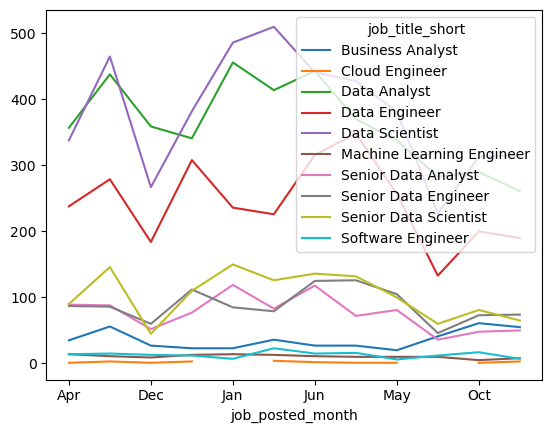

In [87]:
df_us_pivot.plot(kind='line')

In [88]:
top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Scientist', 'Data Analyst', 'Data Engineer']

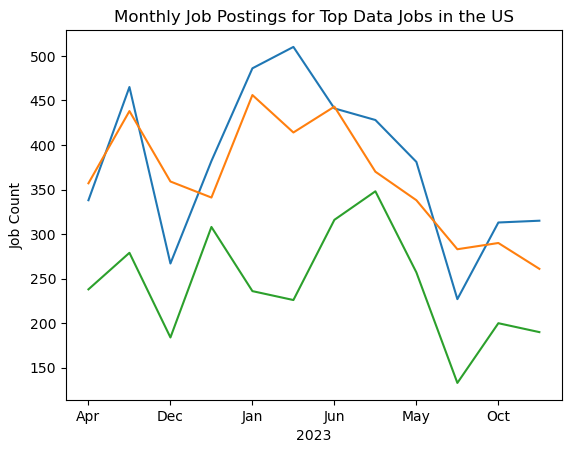

In [90]:
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend('',frameon=False)
plt.show()

<Axes: xlabel='job_posted_month'>

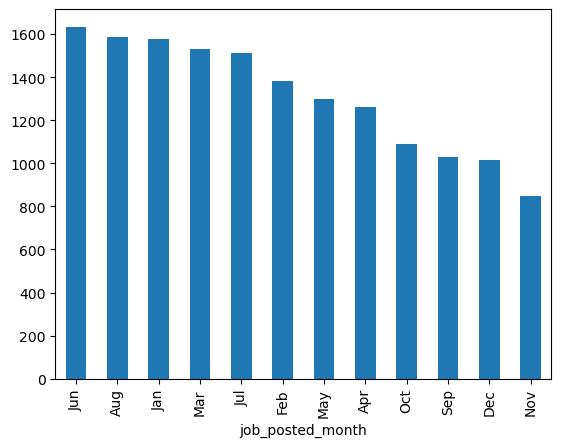

In [103]:
df_us['job_posted_month'].value_counts().plot(kind='bar')

In [33]:
def inflation(salary):
    if (['job_country'] == 'United States'):
        return salary * 1.03
    elif(['job_country'] == 'Mexico'):
         return salary * 1.40
    elif(['job_country'] == 'Denmark'):
         return salary * 1.55
    else:
         return salary * 1.20
df['salary_year_inflated'] = df['salary_year_avg'].apply(inflation)
df_incre=df[pd.notna(df['salary_year_avg'])][['salary_year_avg', 'salary_year_inflated']]

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_year_inflated
0,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",131400.0
1,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",168000.0
2,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",144000.0
3,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",273866.4
4,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",106800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",167059.2
21999,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,180000.0
22000,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",266250.0
22001,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",189000.0


In [115]:
df.dropna(subset=['salary_year_avg']).reset_index()

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
1,77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
2,92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
3,100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
4,109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21998,785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
21999,785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
22000,785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
22001,785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [127]:
df_icc=df_incre.merge(df, on='salary_year_avg')

KeyError: 'index'

In [120]:
df_icc

,salary_year_avg,salary_year_inflated_x,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_hour_avg,company_name,job_skills,job_type_skills,salary_year_inflated_y
0,109500.0,131400.0,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",131400.0
1,109500.0,131400.0,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,NaN,Publicis Groupe,"['excel', 'powerpoint', 'flow']","{'analyst_tools': ['excel', 'powerpoint'], 'ot...",131400.0
2,109500.0,131400.0,Data Scientist,People Data Specialist,Singapore,via Ai-Jobs.net,Full-time,False,Singapore,2023-07-07 13:16:21,False,False,Singapore,year,NaN,Toll Group,None,None,131400.0
3,109500.0,131400.0,Data Scientist,Master Data Specialist for Material & Product ...,"Aveiro, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-20 13:56:45,False,False,Portugal,year,NaN,Bosch Group,"['spark', 'sap']","{'analyst_tools': ['sap'], 'libraries': ['spar...",131400.0
4,109500.0,131400.0,Data Scientist,Master Data Specialist,"Kolding, Denmark",via Ai-Jobs.net,Full-time,False,Denmark,2023-06-20 13:28:01,False,False,Denmark,year,NaN,Vattenfall,"['sap', 'excel']","{'analyst_tools': ['sap', 'excel']}",131400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365146,157500.0,189000.0,Senior Data Scientist,Senior Data Scientist,"Montpellier, France",via Ai-Jobs.net,Full-time,False,France,2023-01-13 06:15:51,False,False,France,year,NaN,Teads,"['scala', 'aws', 'spark', 'kafka', 'jupyter']","{'cloud': ['aws'], 'libraries': ['spark', 'kaf...",189000.0
5365147,157500.0,189000.0,Data Scientist,Data Scientist,"Islamabad, Pakistan",via Ai-Jobs.net,Contractor,False,Pakistan,2023-06-07 06:17:01,False,False,Pakistan,year,NaN,Inbox Business Technologies,"['sql', 'python', 'r', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['sql...",189000.0
5365148,157500.0,189000.0,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,NaN,Optiv,"['r', 'python', 'sql', 'databricks', 'power bi']","{'analyst_tools': ['power bi'], 'cloud': ['dat...",189000.0
5365149,157500.0,189000.0,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",189000.0


In [130]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_year_inflated
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",NaN
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",NaN
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",NaN
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",NaN
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",NaN
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",NaN


In [20]:
#import seaborn as sns
#import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df.info()
#df_exploded = df.explode('job_skills')

#df_exploded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

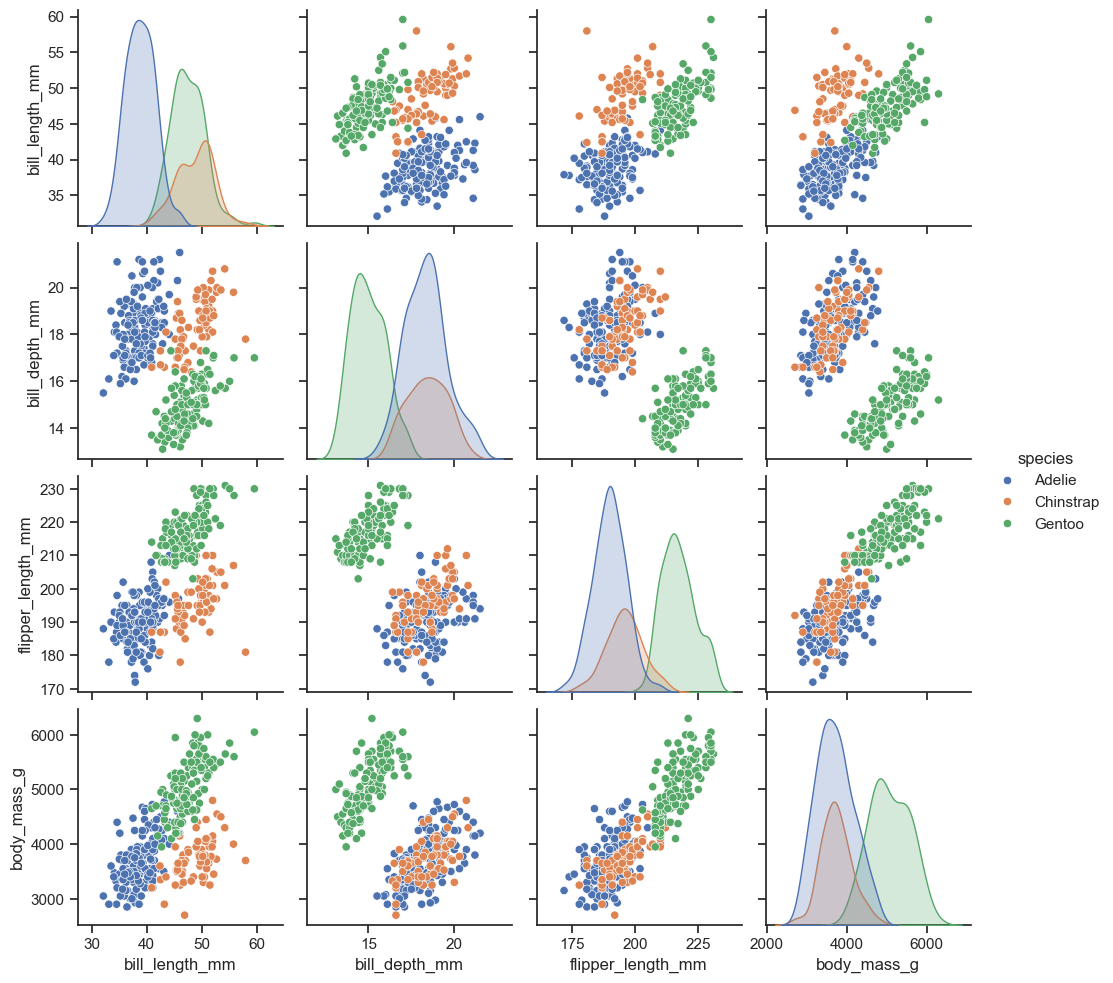

In [37]:
import seaborn as sns
sns.set_theme(style="ticks")

df1 = sns.load_dataset("penguins")
sns.pairplot(df1, hue="species")

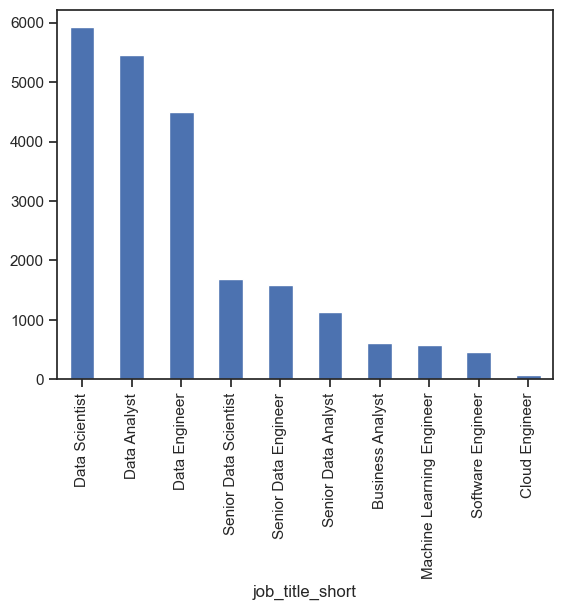

In [70]:
fig, ax = plt.subplots()

# plot the data
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.show()

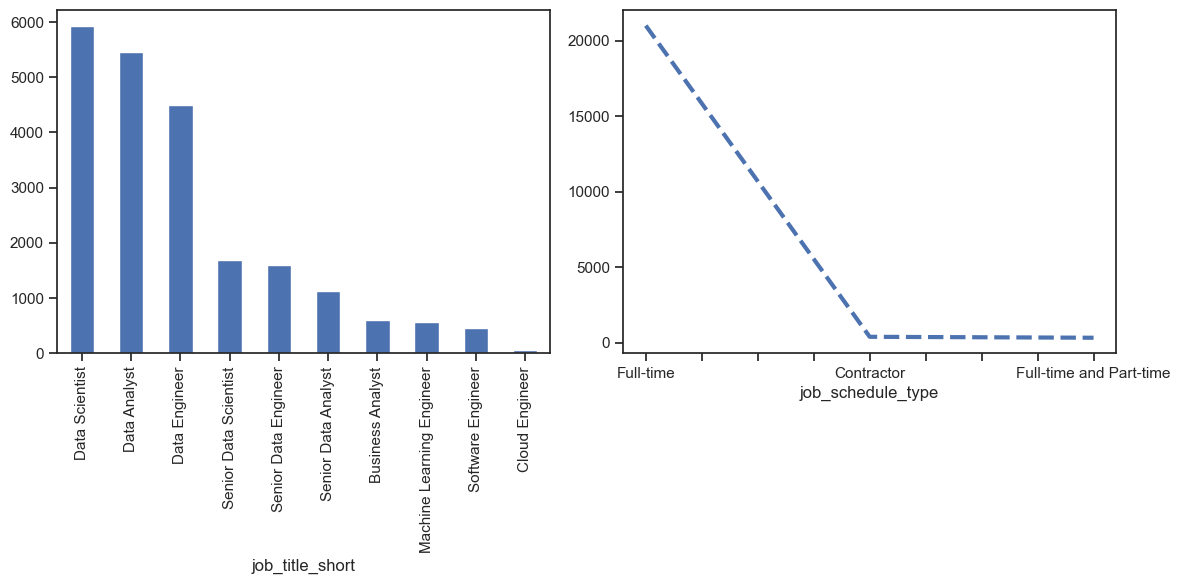

In [80]:
fig, ax = plt.subplots(1, 2,figsize=[12,6])

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='line',linestyle='--',lw='3', ax=ax[1])

# fix the overlap
fig.tight_layout()

plt.show()

In [ ]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

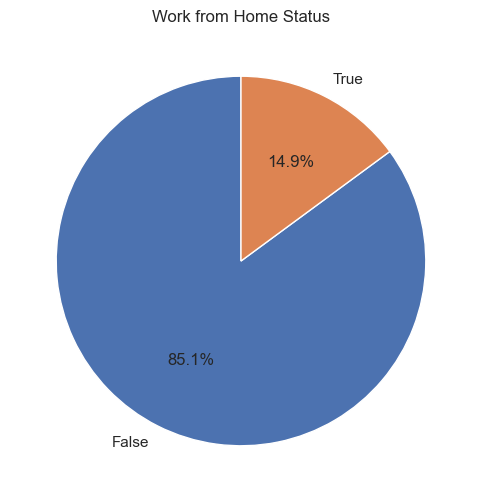

In [89]:
work_from_home = df['job_work_from_home'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90,)
plt.title('Work from Home Status')
plt.show()

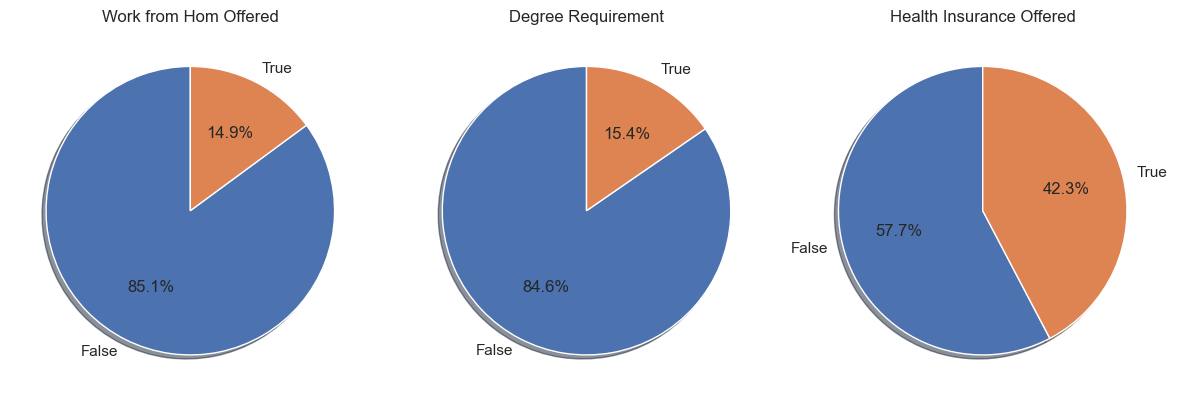

In [91]:
#job_no_degree = df['job_no_degree_mention'].value_counts()
#job_health_insurance = df['job_health_insurance'].value_counts()

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Data Analyst Salaries
plt.subplot(1, 3, 1)
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(df['job_no_degree_mention'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(df['job_health_insurance'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()

In [93]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [94]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,12951
python,125000.0,12869
r,119550.0,5088
aws,135000.0,4949
tableau,111175.0,4814
spark,140000.0,4016
excel,92500.0,3822
azure,125000.0,3466
sas,110000.0,3132


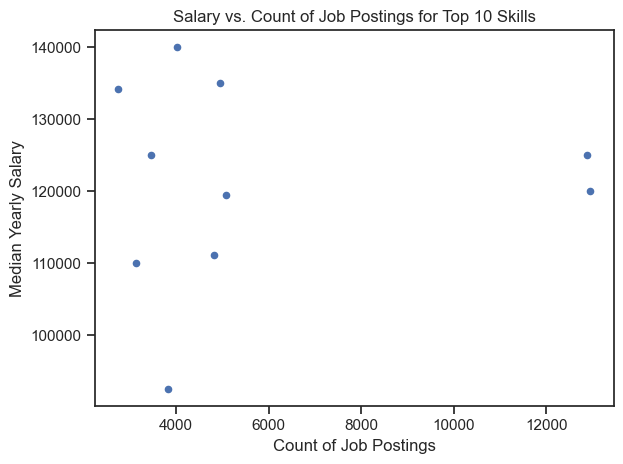

In [95]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

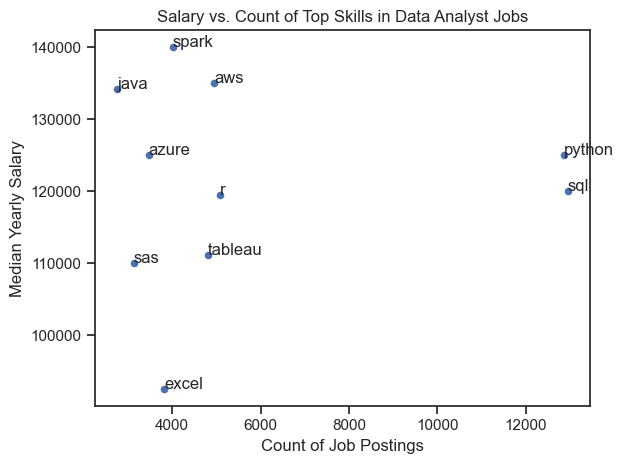

In [96]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()

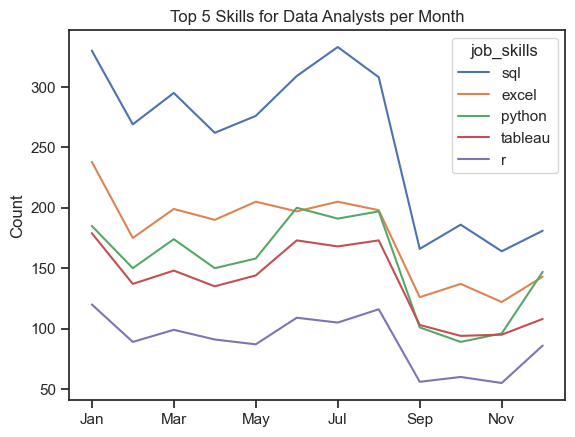

In [97]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

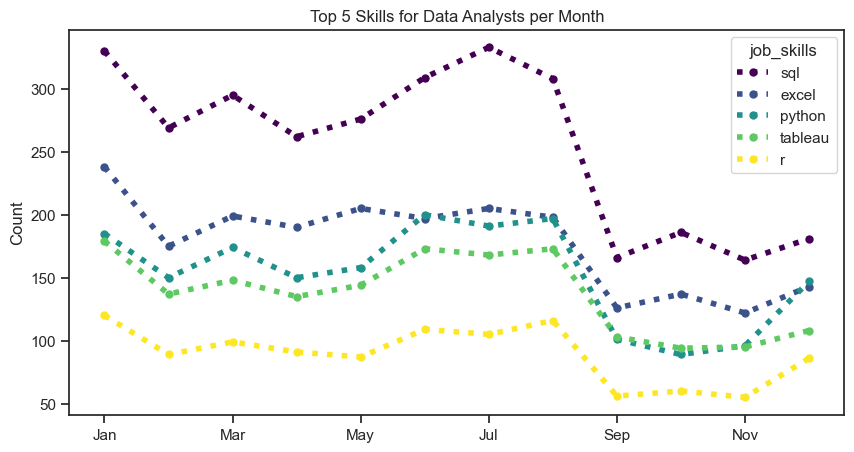

In [98]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=5,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

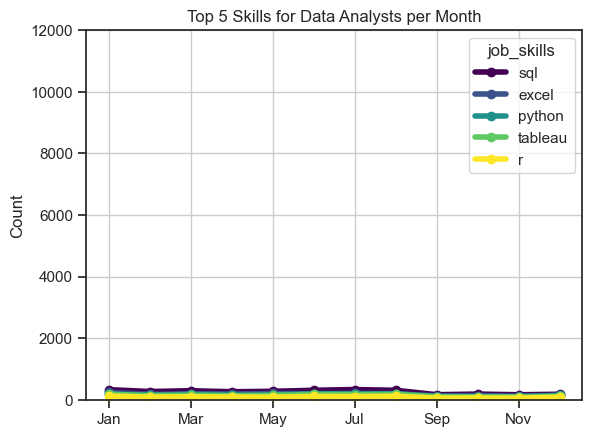

In [99]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()


In [101]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
1,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
2,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
3,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
4,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


NameError: name 'skill_count' is not defined

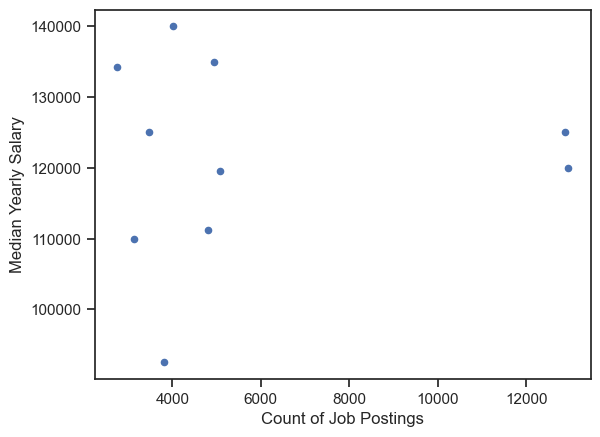

In [102]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()


NameError: name 'adjust_text' is not defined

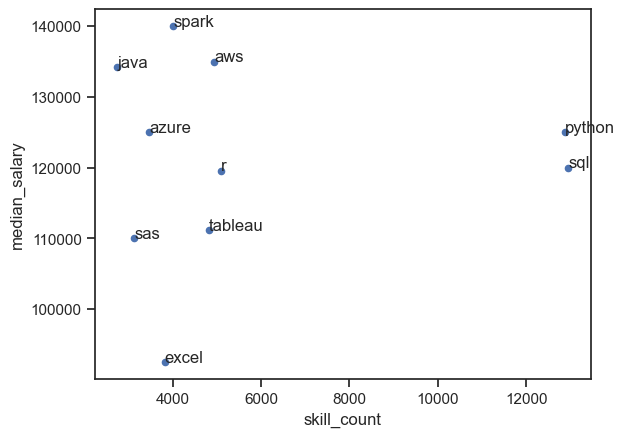

In [103]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [104]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

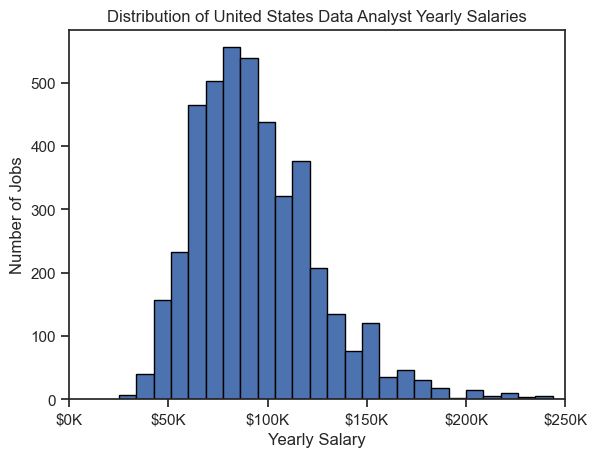

In [105]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

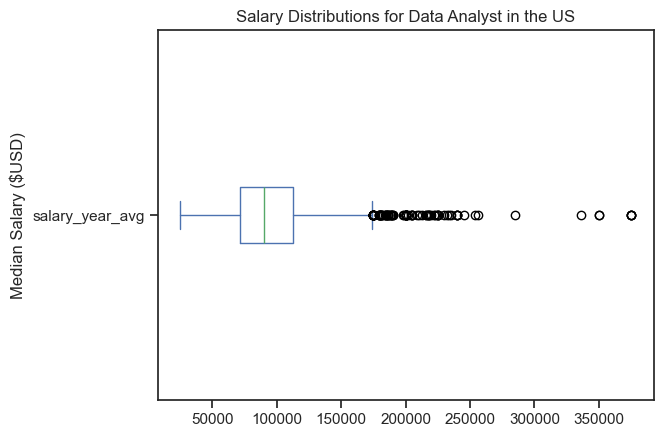

In [106]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()


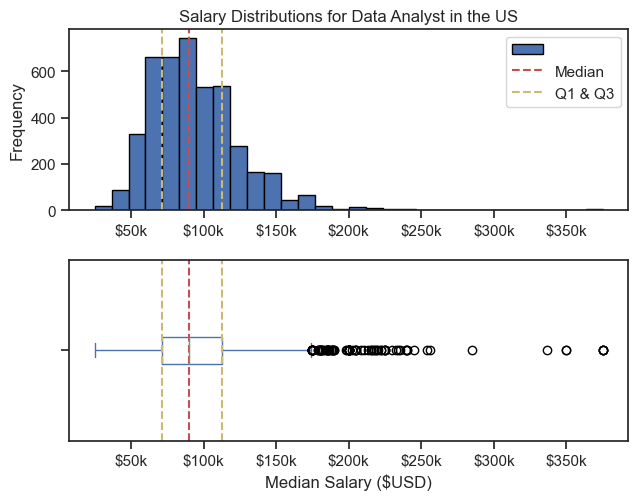

In [107]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

In [108]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

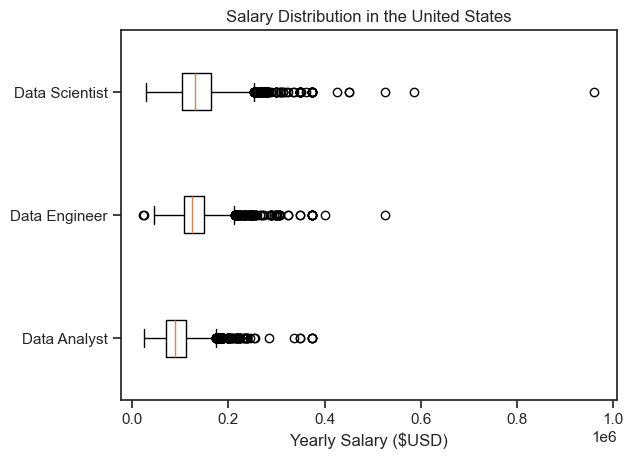

In [109]:
# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

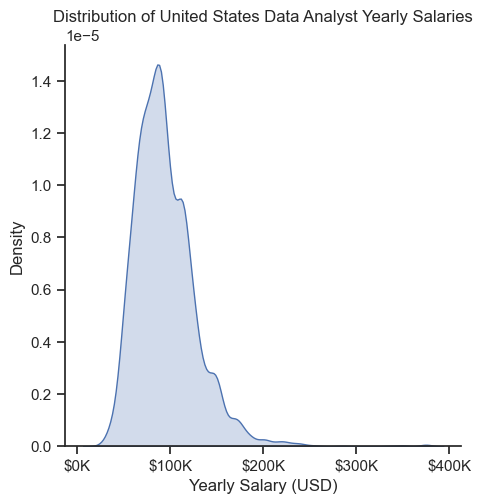

In [111]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True, common_norm=False)

# this is all the same
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density') # Density is the probability of a random variable taking on a particular value
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

In [29]:
import plotly.express as px
data = {
    'X': ['A', 'B', 'C', 'D'],
    'Y': ['W', 'X', 'Y', 'Z'],
    'Value': [1, 2, 3, 4]
}
df = pd.DataFrame(data)

# Create a pivot table
pivot_df = df.pivot(index='Y', columns='X', values='Value')

# Create heatmap
fig = px.imshow(pivot_df, text_auto=True)
fig.update_layout(title='Interactive Heatmap')
fig.show()

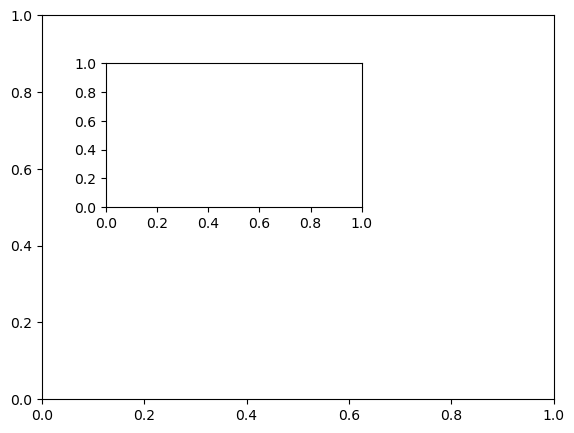

In [40]:
fig= plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
#axes1.plot()